In [3]:
import pandas as pd
import numpy as np
from lightgbm.sklearn import LGBMRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline

In [5]:
train = pd.read_csv('data/used_car_train_20200313.csv',sep=' ')
test = pd.read_csv('data/used_car_testA_20200313.csv',sep=' ')

In [6]:
train.head(10)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
5,5,137642,20090602,24.0,10,0.0,1.0,0.0,109,10.0,...,0.260246,0.000518,0.119838,0.090922,0.048769,1.885526,-2.721943,2.457660,-0.286973,0.206573
6,6,2402,19990411,13.0,4,0.0,0.0,1.0,150,15.0,...,0.267998,0.117675,0.142334,0.025446,0.028174,-4.902200,1.610616,-0.834605,-1.996117,-0.103180
7,7,165346,19990706,26.0,14,1.0,0.0,0.0,101,15.0,...,0.239506,0.000000,0.122943,0.039839,0.082413,3.693829,-0.245014,-2.192810,0.236728,0.195567
8,8,2974,20030205,19.0,1,2.0,1.0,1.0,179,15.0,...,0.263833,0.116583,0.144255,0.039851,0.024388,-4.925234,1.587796,0.075348,-1.551098,0.069433
9,9,82021,19980101,7.0,7,5.0,0.0,0.0,88,15.0,...,0.262473,0.068267,0.012176,0.010291,0.098727,-1.089584,0.600683,-4.186210,0.198273,-1.025822


In [7]:
train.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


看起来 model bodyType fuelType gearbox 几列存在空值

In [8]:
train.isnull().any()

SaleID               False
name                 False
regDate              False
model                 True
brand                False
bodyType              True
fuelType              True
gearbox               True
power                False
kilometer            False
notRepairedDamage    False
regionCode           False
seller               False
offerType            False
creatDate            False
price                False
v_0                  False
v_1                  False
v_2                  False
v_3                  False
v_4                  False
v_5                  False
v_6                  False
v_7                  False
v_8                  False
v_9                  False
v_10                 False
v_11                 False
v_12                 False
v_13                 False
v_14                 False
dtype: bool

总共150000条，缺失的最多的列差不多缺了8000多条

In [9]:
train[['model','bodyType','fuelType','gearbox']].describe()

,model,bodyType,fuelType,gearbox
count,149999.000000,145494.000000,141320.000000,144019.000000
mean,47.129021,1.792369,0.375842,0.224943
std,49.536040,1.760640,0.548677,0.417546
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,0.000000,0.000000
75%,66.000000,3.000000,1.000000,0.000000
max,247.000000,7.000000,6.000000,1.000000


看起来缺失值直接删的话 还剩135000多条

In [10]:
train.dropna().describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,135884.000000,135884.000000,1.358840e+05,135884.000000,135884.000000,135884.000000,135884.000000,135884.000000,135884.000000,135884.000000,...,135884.000000,135884.000000,135884.000000,135884.000000,135884.000000,135884.000000,135884.000000,135884.000000,135884.000000,135884.000000
mean,75034.991434,67144.366967,2.003610e+07,47.966810,8.027627,1.801618,0.375423,0.228548,124.201076,12.564713,...,0.256032,0.046786,0.089826,0.058775,0.063074,-0.373742,-0.469310,-0.076532,0.025200,0.008456
std,43309.047314,60962.383043,5.382424e+04,49.793536,7.864106,1.767968,0.547637,0.419899,172.918350,3.897382,...,0.014009,0.052114,0.043399,0.029019,0.035364,3.470853,1.878271,2.332124,1.290922,1.050417
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.203718,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.074922,-6.546556
25%,37495.750000,10395.250000,1.999111e+07,11.000000,1.000000,0.000000,0.000000,0.000000,75.000000,10.000000,...,0.245445,0.000102,0.060971,0.035931,0.034928,-3.869531,-2.019539,-1.847251,-1.034738,-0.426907
50%,75050.500000,49469.000000,2.004000e+07,30.000000,6.000000,1.000000,0.000000,0.000000,115.000000,15.000000,...,0.258574,0.000895,0.093787,0.057801,0.059771,1.393099,-0.441911,-0.149740,-0.005461,0.155026
75%,112527.250000,116988.000000,2.008021e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265601,0.103096,0.122140,0.080029,0.088349,2.697569,1.130275,1.694543,0.971153,0.700543
max,149999.000000,196812.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,17932.000000,15.000000,...,0.291838,0.151420,0.250896,0.151107,0.213617,5.831949,3.726617,7.800208,5.249750,2.743993


In [11]:
train.fillna(-999,inplace=True)
test.fillna(-999,inplace=True)

看看有哪些列，其中price是要预测的


In [12]:
train.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [13]:
%matplotlib inline

In [14]:
price  = train['price']

In [15]:
price_log = np.log(price)

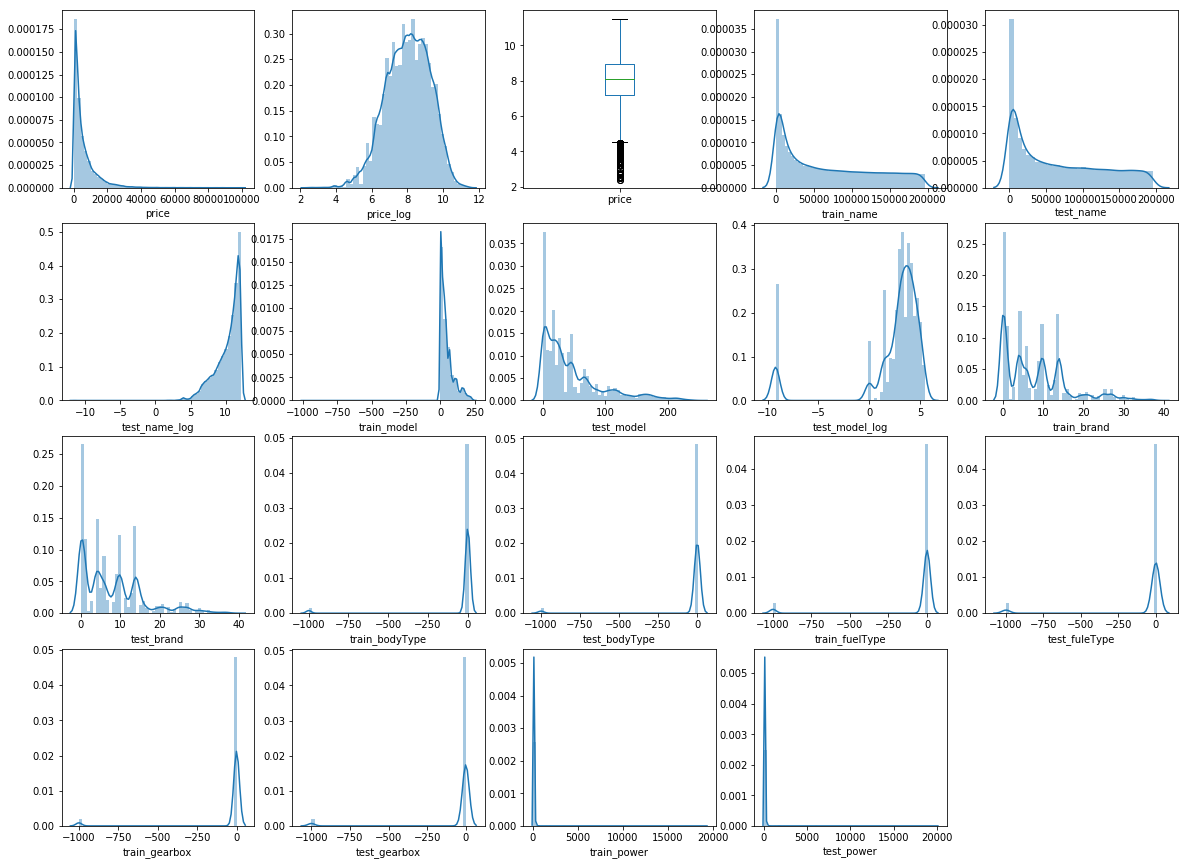

In [16]:
plt.figure(figsize=(20,15))
plt.subplot(4,5,1)
sns.distplot(price)
plt.subplot(4,5,2)
sns.distplot(price_log,axlabel='price_log')
plt.subplot(4,5,3)
price_log.plot.box()
plt.subplot(4,5,4)
sns.distplot(train['name'],axlabel='train_name')
plt.subplot(4,5,5)
sns.distplot(test['name'],axlabel='test_name')
plt.subplot(4,5,6)
sns.distplot(np.log(test['name']+0.00001),axlabel='test_name_log')
plt.subplot(4,5,7)
sns.distplot(train['model'],axlabel='train_model')
plt.subplot(4,5,8)
sns.distplot(test['model'],axlabel='test_model')
plt.subplot(4,5,9)
sns.distplot(np.log(test['model']+0.0001),axlabel='test_model_log')
plt.subplot(4,5,10)
sns.distplot(train['brand'],axlabel='train_brand')
plt.subplot(4,5,11)
sns.distplot(test['brand'],axlabel='test_brand')
plt.subplot(4,5,12)
sns.distplot(train['bodyType'],axlabel='train_bodyType')
plt.subplot(4,5,13)
sns.distplot(test['bodyType'],axlabel='test_bodyType')
plt.subplot(4,5,14)
sns.distplot(train['fuelType'],axlabel='train_fuelType')
plt.subplot(4,5,15)
sns.distplot(test['fuelType'],axlabel='test_fuleType')
plt.subplot(4,5,16)
sns.distplot(train['gearbox'],axlabel='train_gearbox')
plt.subplot(4,5,17)
sns.distplot(test['gearbox'],axlabel='test_gearbox')
plt.subplot(4,5,18)
sns.distplot(train['power'],axlabel='train_power')
plt.subplot(4,5,19)
sns.distplot(test['power'],axlabel='test_power')

In [17]:
train['power'].describe()

count    150000.000000
mean        119.316547
std         177.168419
min           0.000000
25%          75.000000
50%         110.000000
75%         150.000000
max       19312.000000
Name: power, dtype: float64

根据题目，大于600的属于非正常范围，考虑 train上删除记录，test上暂定截断

In [18]:
test['power'].describe()

count    50000.000000
mean       119.883620
std        185.097387
min          0.000000
25%         75.000000
50%        109.000000
75%        150.000000
max      20000.000000
Name: power, dtype: float64

In [19]:
train = train.drop('price',axis=1)
train['notRepairedDamage'] = train['notRepairedDamage'].map(lambda x: -1 if(x=='-') else x)
train['notRepairedDamage'] = train['notRepairedDamage'].map(lambda x: float(x))
test['notRepairedDamage'] = test['notRepairedDamage'].map(lambda x: -1 if(x=='-') else x)
test['notRepairedDamage'] = test['notRepairedDamage'].map(lambda x: float(x))

/Users/yep/anaconda3/envs/tf3.6/lib/python3.6/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


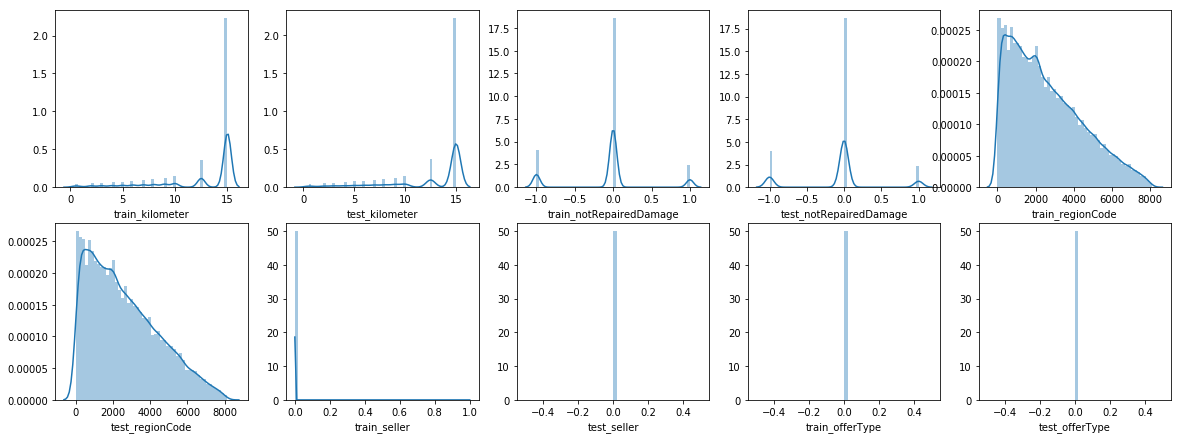

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(4,5,1)
sns.distplot(train['kilometer'],axlabel='train_kilometer')
plt.subplot(4,5,2)
sns.distplot(test['kilometer'],axlabel='test_kilometer')
plt.subplot(4,5,3)
sns.distplot(train['notRepairedDamage'],axlabel='train_notRepairedDamage')
plt.subplot(4,5,4)
sns.distplot(test['notRepairedDamage'],axlabel='test_notRepairedDamage')
plt.subplot(4,5,5)
sns.distplot(train['regionCode'],axlabel='train_regionCode')
plt.subplot(4,5,6)
sns.distplot(test['regionCode'],axlabel='test_regionCode')
plt.subplot(4,5,7)
sns.distplot(train['seller'],axlabel='train_seller')
plt.subplot(4,5,8)
sns.distplot(test['seller'],axlabel='test_seller')
plt.subplot(4,5,9)
sns.distplot(train['offerType'],axlabel='train_offerType')
plt.subplot(4,5,10)
sns.distplot(test['offerType'],axlabel='test_offerType')

seller、offerType字段 test上就一个值 木什么用 可以拿掉

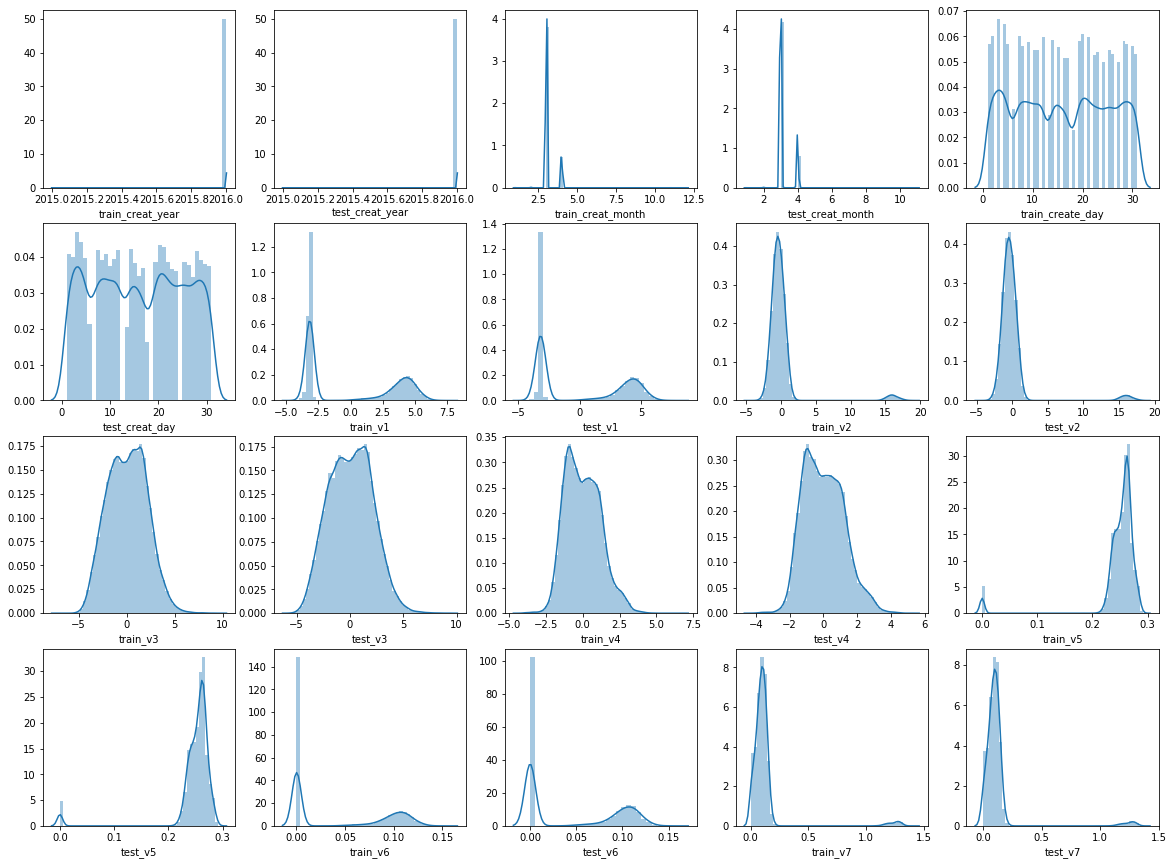

In [21]:
plt.figure(figsize=(20,15))
plt.subplot(4,5,1)
sns.distplot(train['creatDate'].map(lambda x: int(str(x)[:4])),axlabel='train_creat_year')
plt.subplot(4,5,2)
sns.distplot(train['creatDate'].map(lambda x: int(str(x)[:4])),axlabel='test_creat_year')
plt.subplot(4,5,3)
sns.distplot(train['creatDate'].map(lambda x: int(str(x)[4:6])),axlabel='train_creat_month')
plt.subplot(4,5,4)
sns.distplot(test['creatDate'].map(lambda x: int(str(x)[4:6])),axlabel = 'test_creat_month')
plt.subplot(4,5,5)
sns.distplot(train['creatDate'].map(lambda x: int(str(x)[6:])),axlabel='train_create_day')
plt.subplot(4,5,6)
sns.distplot(test['creatDate'].map(lambda x: int(str(x)[6:])),axlabel='test_creat_day')
plt.subplot(4,5,7)
sns.distplot(train['v_1'],axlabel='train_v1')
plt.subplot(4,5,8)
sns.distplot(test['v_1'],axlabel='test_v1')
plt.subplot(4,5,9)
sns.distplot(train['v_2'],axlabel='train_v2')
plt.subplot(4,5,10)
sns.distplot(test['v_2'],axlabel='test_v2')
plt.subplot(4,5,11)
sns.distplot(train['v_3'],axlabel='train_v3')
plt.subplot(4,5,12)
sns.distplot(test['v_3'],axlabel='test_v3')
plt.subplot(4,5,13)
sns.distplot(train['v_4'],axlabel='train_v4')
plt.subplot(4,5,14)
sns.distplot(test['v_4'],axlabel='test_v4')
plt.subplot(4,5,15)
sns.distplot(train['v_5'],axlabel='train_v5')
plt.subplot(4,5,16)
sns.distplot(test['v_5'],axlabel='test_v5')
plt.subplot(4,5,17)
sns.distplot(train['v_6'],axlabel='train_v6')
plt.subplot(4,5,18)
sns.distplot(test['v_6'],axlabel='test_v6')
plt.subplot(4,5,19)
sns.distplot(train['v_7'],axlabel='train_v7')
plt.subplot(4,5,20)
sns.distplot(test['v_7'],axlabel='test_v7')

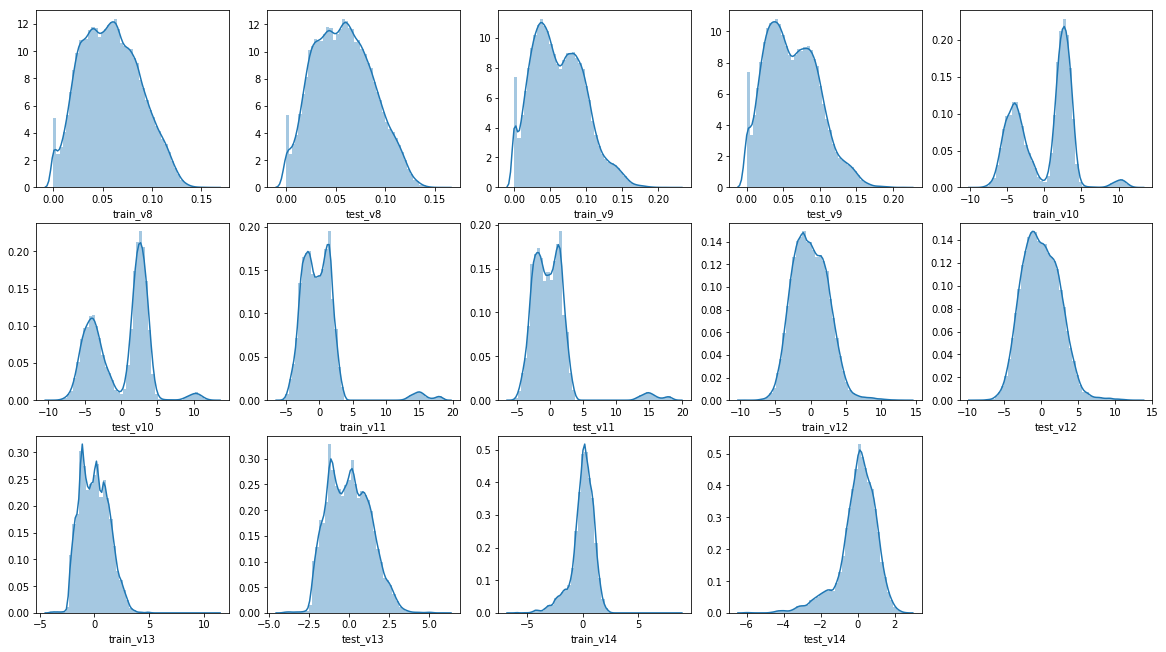

In [22]:
plt.figure(figsize=(20,15))
plt.subplot(4,5,1)
sns.distplot(train['v_8'],axlabel='train_v8')
plt.subplot(4,5,2)
sns.distplot(test['v_8'],axlabel='test_v8')
plt.subplot(4,5,3)
sns.distplot(train['v_9'],axlabel='train_v9')
plt.subplot(4,5,4)
sns.distplot(test['v_9'],axlabel='test_v9')
plt.subplot(4,5,5)
sns.distplot(train['v_10'],axlabel='train_v10')
plt.subplot(4,5,6)
sns.distplot(test['v_10'],axlabel='test_v10')
plt.subplot(4,5,7)
sns.distplot(train['v_11'],axlabel='train_v11')
plt.subplot(4,5,8)
sns.distplot(test['v_11'],axlabel='test_v11')
plt.subplot(4,5,9)
sns.distplot(train['v_12'],axlabel='train_v12')
plt.subplot(4,5,10)
sns.distplot(test['v_12'],axlabel='test_v12')
plt.subplot(4,5,11)
sns.distplot(train['v_13'],axlabel='train_v13')
plt.subplot(4,5,12)
sns.distplot(test['v_13'],axlabel='test_v13')
plt.subplot(4,5,13)
sns.distplot(train['v_14'],axlabel='train_v14')
plt.subplot(4,5,14)
sns.distplot(test['v_14'],axlabel='test_v14')

观察到训练集上测试集上v13 v14分布有些不一致

In [23]:
train[['v_13','v_14']].describe()

,v_13,v_14
count,150000.000000,150000.000000
mean,0.000313,-0.000688
std,1.288988,1.038685
min,-4.153899,-6.546556
25%,-1.057789,-0.437034
50%,-0.036245,0.141246
75%,0.942813,0.680378
max,11.147669,8.658418


In [22]:
test[['v_13','v_14']].describe()

,v_13,v_14
count,50000.000000,50000.000000
mean,-0.003147,0.001516
std,1.286597,1.027360
min,-4.123333,-6.112667
25%,-1.060428,-0.437920
50%,-0.035956,0.138799
75%,0.941469,0.681163
max,5.913273,2.624622


In [23]:
train[['regDate','creatDate']].head(10)

,regDate,creatDate
0,20040402,20160404
1,20030301,20160309
2,20040403,20160402
3,19960908,20160312
4,20120103,20160313
5,20090602,20160319
6,19990411,20160317
7,19990706,20160326
8,20030205,20160326
9,19980101,20160402


In [24]:
train['year_var'] = train['creatDate'].map(lambda x: int(str(x)[:4])) -  train['regDate'].map(lambda x: int(str(x)[:4]))
train['month_var'] = train['creatDate'].map(lambda x: int(str(x)[4:6])) -  train['regDate'].map(lambda x: int(str(x)[4:6]))
train['day_var'] = train['creatDate'].map(lambda x: int(str(x)[6:])) -  train['regDate'].map(lambda x: int(str(x)[6:]))

In [25]:
test['year_var'] = test['creatDate'].map(lambda x: int(str(x)[:4])) -  test['regDate'].map(lambda x: int(str(x)[:4]))
test['month_var'] = test['creatDate'].map(lambda x: int(str(x)[4:6])) -  test['regDate'].map(lambda x: int(str(x)[4:6]))
test['day_var'] = test['creatDate'].map(lambda x: int(str(x)[6:])) -  test['regDate'].map(lambda x: int(str(x)[6:]))

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


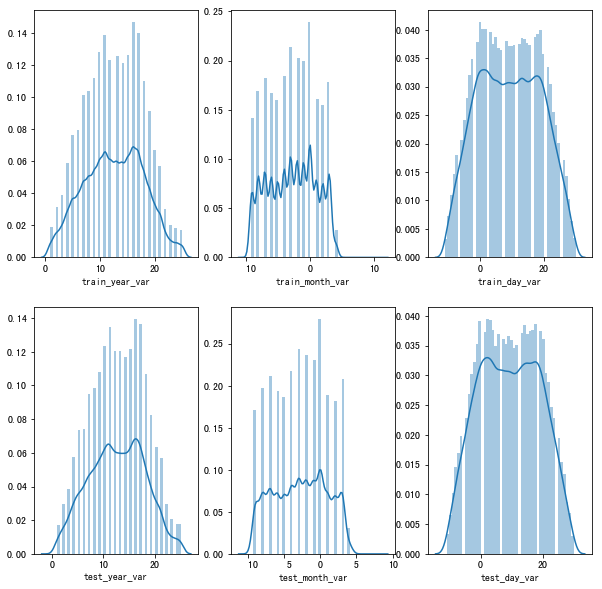

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
sns.distplot(train['year_var'],axlabel='train_year_var')
plt.subplot(2,3,2)
sns.distplot(train['month_var'],axlabel='train_month_var')
plt.subplot(2,3,3)
sns.distplot(train['day_var'],axlabel='train_day_var')
plt.subplot(2,3,4)
sns.distplot(test['year_var'],axlabel='test_year_var')
plt.subplot(2,3,5)
sns.distplot(test['month_var'],axlabel='test_month_var')
plt.subplot(2,3,6)
sns.distplot(test['day_var'],axlabel='test_day_var')

In [27]:
len(train.columns)

33

In [28]:
len(test.columns)

33

In [29]:
mask = (train['power']<600) & (train['seller']==0) & (train['v_13']<6) &(train['v_14']<2.8)

In [30]:
train = train[mask]

In [31]:
price_log = price_log[mask]

In [32]:
price = price[mask]

In [33]:
train.drop(['seller','offerType'],axis=1,inplace=True)
test.drop(['seller','offerType'],axis=1,inplace=True)

In [34]:
test['power'] = test['power'].map(lambda x: x if(x<600) else 600)

In [35]:
corr = train.corr()

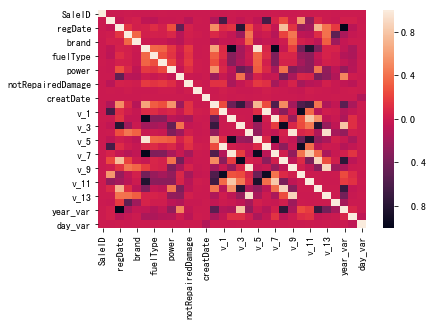

In [36]:
sns.heatmap(corr,)

In [37]:
train_x,val_x,train_y,val_y = train_test_split(train,price_log)

In [38]:
lgb1 = LGBMRegressor(n_estimators=2000,num_leaves=90,max_depth=13,early_stopping_round=50,metric=['l1'])

In [39]:
lgb1.fit(train_x,train_y,eval_set=[(val_x,val_y)],eval_metric='l1')


/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:104: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 0.905988
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's l1: 0.822555
[3]	valid_0's l1: 0.747553
[4]	valid_0's l1: 0.680619
[5]	valid_0's l1: 0.620616
[6]	valid_0's l1: 0.567258
[7]	valid_0's l1: 0.519516
[8]	valid_0's l1: 0.477318
[9]	valid_0's l1: 0.43947
[10]	valid_0's l1: 0.406332
[11]	valid_0's l1: 0.376634
[12]	valid_0's l1: 0.35028
[13]	valid_0's l1: 0.326437
[14]	valid_0's l1: 0.305577
[15]	valid_0's l1: 0.286882
[16]	valid_0's l1: 0.2705
[17]	valid_0's l1: 0.256072
[18]	valid_0's l1: 0.243119
[19]	valid_0's l1: 0.231469
[20]	valid_0's l1: 0.221318
[21]	valid_0's l1: 0.212581
[22]	valid_0's l1: 0.204862
[23]	valid_0's l1: 0.197973
[24]	valid_0's l1: 0.19185
[25]	valid_0's l1: 0.186579
[26]	valid_0's l1: 0.18177
[27]	valid_0's l1: 0.177296
[28]	valid_0's l1: 0.17378
[29]	valid_0's l1: 0.170721
[30]	valid_0's l1: 0.168089
[31]	valid_0's l1: 0.165497
[32]	valid_0's l1: 0.163311
[33]	valid_0's l1: 0.161477
[34]	valid_0's l1: 0.159778
[3

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       early_stopping_round=50, learning_rate=0.1, max_depth=13,
       metric=['l1'], min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=2000, n_jobs=-1, num_leaves=90,
       objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=1)

In [40]:
lgb1.feature_importances_

array([10305,  8057,  9855,  3775,  2831,  1013,   808,   602,  5760,
        2580,   936, 10566,  6349,  7215,  8439,  6198,  8028,  4974,
        4716,  7080,  6297,  8320,  5088,  6666,  8813,  6759,  5274,
        7939,  1099,  4528,  6418])

In [41]:
train.columns[lgb1.feature_importances_>5000]

Index(['SaleID', 'name', 'regDate', 'power', 'regionCode', 'creatDate', 'v_0',
       'v_1', 'v_2', 'v_3', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'day_var'],
      dtype='object')

In [42]:
def col_mul(data):
    cols1 = ['SaleID', 'name', 'regDate', 'power', 'regionCode', 'creatDate', 'v_0',
       'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10',
       'v_11', 'v_12', 'v_13', 'v_14', 'day_var']
    cols2 = ['SaleID', 'name', 'regDate', 'power', 'regionCode', 'creatDate', 'v_0',
       'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10',
       'v_11', 'v_12', 'v_13', 'v_14', 'day_var']
    result = pd.DataFrame()
    i=1
    for col1 in cols1:
        if(len(cols2[i:])==0):
            pass
        for col2 in cols2[i:]:
            if(col2==col1):
                pass
            new_col = data[col1] * data[col2]
            result[col1 +'_'+'mul'+'_'+col2] = new_col
            ++i
    return result

In [43]:
train_ = pd.concat([train,col_mul(train)],axis=1)

In [44]:
train_x1,val_x1,train_y1,val_y1 = train_test_split(train_,price_log)


In [45]:
lgb2 = LGBMRegressor(n_estimators=2000,num_leaves=90,max_depth=13,early_stopping_round=50,metric=['l1'])
lgb2.fit(train_x1,train_y1,eval_set=[(val_x1,val_y1)],eval_metric='l1')

/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:104: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 0.902629
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's l1: 0.818584
[3]	valid_0's l1: 0.743244
[4]	valid_0's l1: 0.676125
[5]	valid_0's l1: 0.615993
[6]	valid_0's l1: 0.562254
[7]	valid_0's l1: 0.514573
[8]	valid_0's l1: 0.471814
[9]	valid_0's l1: 0.433983
[10]	valid_0's l1: 0.40027
[11]	valid_0's l1: 0.37052
[12]	valid_0's l1: 0.344002
[13]	valid_0's l1: 0.320434
[14]	valid_0's l1: 0.299456
[15]	valid_0's l1: 0.280896
[16]	valid_0's l1: 0.264498
[17]	valid_0's l1: 0.249813
[18]	valid_0's l1: 0.237201
[19]	valid_0's l1: 0.22602
[20]	valid_0's l1: 0.216055
[21]	valid_0's l1: 0.207427
[22]	valid_0's l1: 0.199795
[23]	valid_0's l1: 0.193154
[24]	valid_0's l1: 0.187282
[25]	valid_0's l1: 0.182255
[26]	valid_0's l1: 0.177585
[27]	valid_0's l1: 0.17372
[28]	valid_0's l1: 0.170266
[29]	valid_0's l1: 0.167244
[30]	valid_0's l1: 0.164626
[31]	valid_0's l1: 0.162536
[32]	valid_0's l1: 0.160521
[33]	valid_0's l1: 0.158799
[34]	valid_0's l1: 0.157183

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       early_stopping_round=50, learning_rate=0.1, max_depth=13,
       metric=['l1'], min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=2000, n_jobs=-1, num_leaves=90,
       objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=1)

In [46]:
lgb2.feature_importances_

array([ 622,  336, 2892, 1221, 1143,  288,  305,  189,  198, 1241,  554,
        581, 1936,  858,  651,  243,  401,  220,  514,  494,  467,  618,
        233,  325,  347,  346,  210,  313,  929, 1535,   69, 1502,  163,
       1239, 1697,    0,  507, 1183,  870,  935,  850,  566,  933, 1027,
       1040, 1074, 1123, 1226,  887,  859, 1017, 1239,    0,   92,  714,
       1650,   50,  200,  607,  753,  695,  671,  195,  458,  779,  779,
        765,  696,  855,  644,  561,  779, 1122,    0,    0,  337,  180,
       1710,  740,  311,   57,  202,   62,  451,  295,  152,  279,   80,
        181,  115,  136,   77,   90,  258,    0,    0,    0, 1205,  454,
        400,  783,  728, 1027,  691,  474,  892,  861,  764, 1153,  912,
       1448,  935,  641,  870,  960,    0,    0,    0,    0,   83,  410,
       1003,  956,  990,  886,  410,  760, 1059, 1074, 1019, 1079, 1268,
        881,  800, 1092, 1177,    0,    0,    0,    0,    0,   73,   11,
          3,   40,    1,   12,   41,    6,   12,   

In [ ]:
lgb3 = LGBMRegressor(n_estimators=1970,num_leaves=90,max_depth=13)
lgb3.fit(train,price_log)

In [48]:
result = lgb3.predict(test)

In [49]:
result = np.exp(result)

In [50]:
result = pd.Series(result)

In [51]:
result = pd.concat([test['SaleID'],result],axis=1)

In [52]:
result.columns = ['SaleID','price']

In [53]:
result.head(10)

,SaleID,price
0,150000,36076.821923
1,150001,344.545681
2,150002,6017.759559
3,150003,12266.066742
4,150004,631.041293
5,150005,2161.673259
6,150006,4745.571663
7,150007,9776.563587
8,150008,2639.406464
9,150009,2182.490830


In [ ]:
result.to_csv('./myspace/result.csv',index=None)